In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras import losses
from keras import metrics
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# Загружаем датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Преобразуем целочисленные пиксели к типа float32
# x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Преобразуем матрицы размером 28x28 пикселей в вектор из 784 элементов
# x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='sigmoid'),
    Dense(1024, activation='sigmoid'),
    Dense(1024, activation='sigmoid'),
    Dense(10, activation='softmax'),
])


In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=50,
    batch_size=2048,
    validation_data=(x_val, y_val)
)

Epoch 1/50
25/25 [==============================] - 9s 320ms/step - loss: 2.1946 - accuracy: 0.2481 - val_loss: 1.4648 - val_accuracy: 0.5005
Epoch 2/50
25/25 [==============================] - 7s 288ms/step - loss: 1.0674 - accuracy: 0.5987 - val_loss: 0.8051 - val_accuracy: 0.7125
Epoch 3/50
25/25 [==============================] - 7s 279ms/step - loss: 0.6949 - accuracy: 0.7378 - val_loss: 0.6132 - val_accuracy: 0.7734
Epoch 4/50
25/25 [==============================] - 7s 284ms/step - loss: 0.5766 - accuracy: 0.7826 - val_loss: 0.5475 - val_accuracy: 0.8004
Epoch 5/50
25/25 [==============================] - 7s 285ms/step - loss: 0.5226 - accuracy: 0.8095 - val_loss: 0.5039 - val_accuracy: 0.8186
Epoch 6/50
25/25 [==============================] - 7s 282ms/step - loss: 0.4835 - accuracy: 0.8265 - val_loss: 0.4661 - val_accuracy: 0.8329
Epoch 7/50
25/25 [==============================] - 7s 283ms/step - loss: 0.4552 - accuracy: 0.8369 - val_loss: 0.4529 - val_accuracy: 0.8384
Epoch 

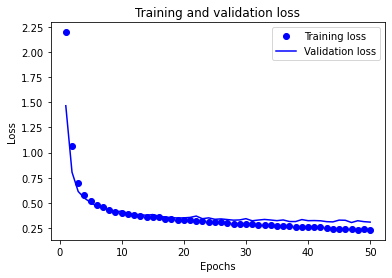

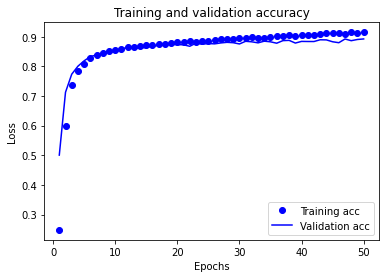

In [7]:
history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3386 - accuracy: 0.8829
